In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Drop the customerID column
df.drop('customerID', axis=1, inplace=True)

### Change the data type of the TotalCharges column to numeric
pd.to_numeric(df['TotalCharges'])

*It was showing some error

### Let's find the rows which shows error

In [5]:
## This converts non-numeric strings to NaN (Not a Number).
converted_charges = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

## Find where the converted values are NaN
df[converted_charges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
len(df[converted_charges.isna()])

11

* Since it's just 11 rows where the values NaN (" "). Will remove these rows from df

In [7]:
df.shape

(7043, 20)

In [8]:
# Create the list of indices you want to drop
indices_to_drop = df[converted_charges.isna()].index
indices_to_drop

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [9]:
# Drop them from your DataFrame 'df'
df.drop(indices_to_drop, inplace = True)

In [10]:
df.shape

(7032, 20)

In [11]:
# Now let's convert the column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtypes

dtype('float64')

## Feature Engineering

### Let's check categorical columns and their unique values

In [12]:
#Let's check categorical columns and their unique values
for cat_cols in df.select_dtypes(include = ['object']).columns:
    print(f'{cat_cols}: {df[cat_cols].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


* 'No internet service' and 'No are same thing so let's replace the values

### Replace the values with correct one

In [13]:
cols_to_replace = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                  'TechSupport','StreamingTV','StreamingMovies']

for col in cols_to_replace:
    df[col] = df[col].replace({'No internet service': 'No'})

# Replace 'No phone service' value with 'No'
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service':'No'})

In [14]:
#Let's check again categorical columns and their unique values
for cat_cols in df.select_dtypes(include = ['object']).columns:
    print(f'{cat_cols}: {df[cat_cols].nunique()}: {df[cat_cols].unique()}')

gender: 2: ['Female' 'Male']
Partner: 2: ['Yes' 'No']
Dependents: 2: ['No' 'Yes']
PhoneService: 2: ['No' 'Yes']
MultipleLines: 2: ['No' 'Yes']
InternetService: 3: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 2: ['No' 'Yes']
OnlineBackup: 2: ['Yes' 'No']
DeviceProtection: 2: ['No' 'Yes']
TechSupport: 2: ['No' 'Yes']
StreamingTV: 2: ['No' 'Yes']
StreamingMovies: 2: ['No' 'Yes']
Contract: 3: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2: ['Yes' 'No']
PaymentMethod: 4: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: 2: ['No' 'Yes']


## Lebale Encoding

In [15]:
# Automatically encode all binary categorical columns with Lebel Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for cols in df.select_dtypes(include=['object']).columns:
    if df[cols].nunique() == 2:
        df[cols] = le.fit_transform(df[cols])

In [16]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [17]:
df.shape

(7032, 20)

### Now let's apply convert rest categorical columns with one-hot encoding

In [18]:
# Encode remaining categorical columns at once
df = pd.get_dummies(df, drop_first = True, dtype = int)

In [19]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1


## Feature Scalling

In [20]:
# Let's create a copy of the dataframe
df1 = df.copy()

In [21]:
# Let's find the columns that need to be normalize
df1.columns[(df1 > 1).any()]

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [22]:
## Let's scale down the features with larger values between 0 to 1 using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df1[scaler_cols] = pd.DataFrame(scaler.fit_transform(df1[scaler_cols]),
                               columns=scaler_cols,index=df.index)

In [23]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1


In [24]:
# Let's round the scaled values with only two decimal
for cols in scaler_cols:
    df1[cols] = df1[cols].round(2)

In [25]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.00,0,0,0,1,0,...,0.12,0.00,0,0,0,0,0,0,1,0
1,1,0,0,0,0.46,1,0,1,0,1,...,0.39,0.22,0,0,0,1,0,0,0,1
2,1,0,0,0,0.01,1,0,1,1,0,...,0.35,0.01,1,0,0,0,0,0,0,1


* Now all the values are between 0 and 1

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.drop('Churn', axis=1),
                                                    df1['Churn'],
                                                    test_size=0.3, random_state=42)

## Build the Neural Network


In [30]:
# Important Libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization

In [31]:
# Build the Neural Network
model = Sequential([Dense(128, input_dim = 23 ,activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(64, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(1, activation = 'sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the model

In [50]:
X_train.shape

(4922, 23)

In [52]:
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          batch_size= 64, epochs=100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8699 - loss: 0.2773 - val_accuracy: 0.7531 - val_loss: 0.5964
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8828 - loss: 0.2671 - val_accuracy: 0.7583 - val_loss: 0.6047
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8700 - loss: 0.2802 - val_accuracy: 0.7507 - val_loss: 0.5986
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8798 - loss: 0.2644 - val_accuracy: 0.7498 - val_loss: 0.6080
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8723 - loss: 0.2778 - val_accuracy: 0.7521 - val_loss: 0.6060
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8647 - loss: 0.2796 - val_accuracy: 0.7531 - val_loss: 0.6166
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8747 - loss: 0.2737 - val_accuracy: 0.7517 - val_loss: 0.6024
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8744 - loss: 0.2775 - val_accuracy: 0.7569 - v

## Model performance based on Epochs

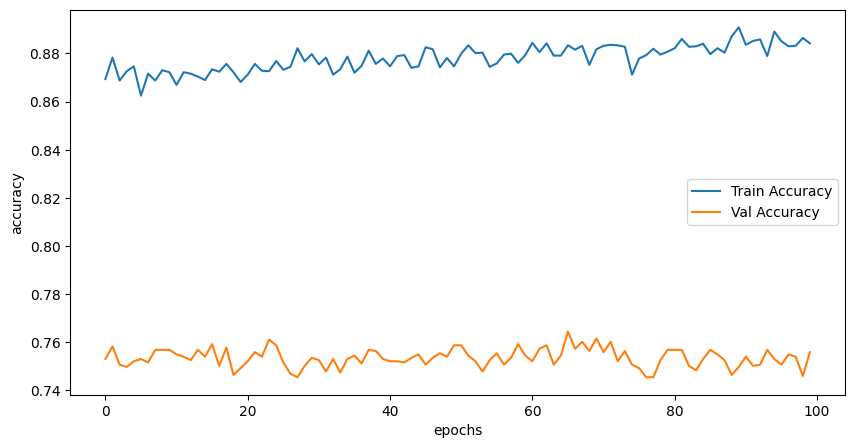

In [55]:
# Check model's accuracy on training and test data based on epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Model Evaluation & Prediction

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

y_prob = model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n",(confusion_matrix(y_test, y_pred)))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1549
           1       0.54      0.56      0.55       561

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110

Confusion matrix:
 [[1282  267]
 [ 248  313]]


## Display Confusion Matrix

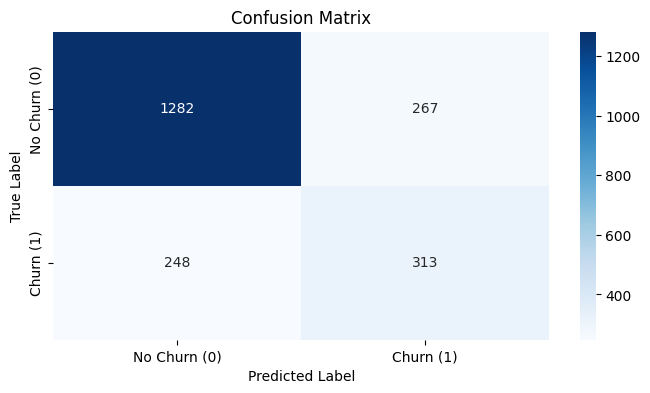

In [84]:
# Define your human-readable class names
class_names = ['No Churn (0)', 'Churn (1)']

# 1. Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot the Heatmap
plt.figure(figsize=(8, 4))
# 'fmt="d"' ensures the counts are displayed as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# Add Titles and Labels
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Display the plot
plt.show()